## Set-up
### Module imports

In [38]:
from irp.envs import Sahba2008UltraSoundEnv
from irp.wrappers import Discretize
from irp.q import Q
from irp import utils
import irp

from gym.wrappers import TimeLimit
import numpy as np

import copy
import matplotlib.pyplot as plt

### Set-up the training and evaluation environment

In [29]:
# Define the model we'll use
model_id = 1

In [30]:
# Extract the meta-data associated with the model we'll use
experiment = np.load(f'../irp/results/sahba2008/meta_{model_id}.npy', allow_pickle=True).item()['experiment']
# Load the images we'll use
data = utils.make_sample_label(experiment['train_image_path'], experiment['test_image_path'])
# Only use the train images
train_image, train_label = data[0]
test_image, test_label = data[1]

In [31]:
# Values we need to setting up the environment and model again
values = ['num_thresholds', 'vjs', 'lows', 'highs', 'bins', 'episode_length']
# Extract the values
num_thresholds, vjs, lows, highs, bins, episode_length = [experiment[key] for key in values]

In [32]:
# Initialize the train and evaluation environments
env = utils.setup_environment(train_image, train_label, num_thresholds, vjs, lows, highs, bins, episode_length)
eval_env = utils.setup_environment(test_image, test_label, num_thresholds, vjs, lows, highs, bins, episode_length)

### Load the model

In [33]:
# Create the path to the model
model_path = f'../irp/results/sahba2008/model_{model_id}'
# Load the model
model = Q.load(model_path, env)

## Behaviour visualization

### Random behavior on training data

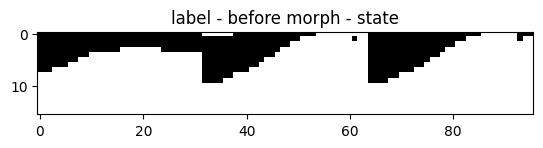

In [39]:
# Reset the environment and show a rendering of it
s = env.reset(); env.render()

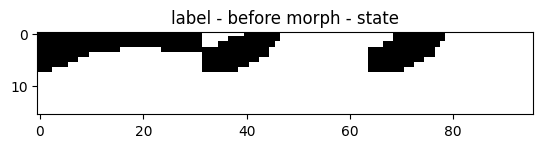

In [48]:
# Select random actions and perform them
a = env.action_space.sample(); env.step(a)
env.render()

### Intelligent behaviour on training data

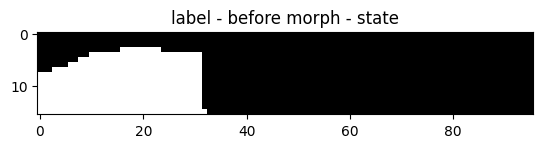

In [95]:
# Reset the environment and show a rendering of it
s = env.reset(); env.render()

In [87]:
s = s_

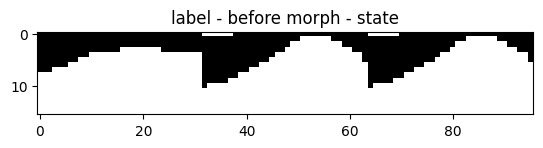

In [111]:
a = model.predict(s, deterministic=True)
s_, r, d, i = env.step(a)
s = s_

env.render()

### Random behaviour on test data

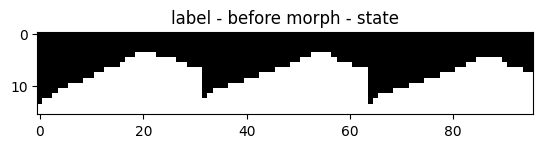

In [100]:
# Reset the environment and show a rendering of it
s = eval_env.reset(); eval_env.render()

In [ ]:
# Select random actions and perform them
a = eval_env.action_space.sample(); eval_env.step(a)
eval_env.render()

In [ ]:
a = eval_env.action_space.sample(); eval_env.step(a)
eval_env.render()

### Intelligent behaviour on test data

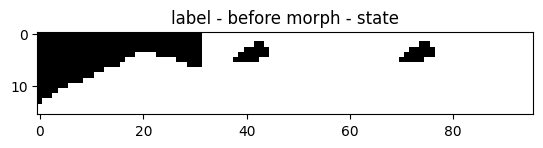

In [201]:
# Reset the environment and show a rendering of it
s = eval_env.reset(); eval_env.render()

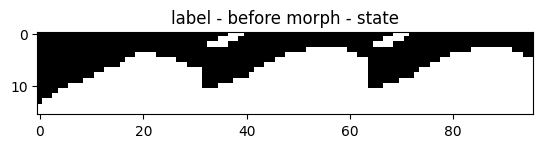

In [212]:
a = model.predict(s, deterministic=True)
s_, r, d, i = eval_env.step(a)
s = s_

eval_env.render()